In [116]:
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt 

In [117]:
graph_no_2020 = xr.open_dataset('/glade/campaign/cisl/aiml/akn7/CREDIT_arXiv/VERIF/graph_no_d_f/epoch1/2020/combined_rmse_0000_0731_006h_240h_graph_no_d_f.nc')
graph_no1 = xr.open_dataset('/glade/derecho/scratch/akn7/CREDIT_arXiv/VERIF/graph_no_ens/0_1/T/member1/combined_rmse_0000_0047_006h_240h_graph_no_ens.nc')
graph_no2 = xr.open_dataset('/glade/derecho/scratch/akn7/CREDIT_arXiv/VERIF/graph_no_ens/0_1/T/member2/combined_rmse_0000_0047_006h_240h_graph_no_ens.nc')
graph_no3 = xr.open_dataset('/glade/derecho/scratch/akn7/CREDIT_arXiv/VERIF/graph_no_ens/0_1/T/member3/combined_rmse_0000_0047_006h_240h_graph_no_ens.nc')


graph_2020 = xr.open_dataset('/glade/campaign/cisl/aiml/akn7/CREDIT_arXiv/VERIF/graph_d_fine/epoch3/2020/combined_rmse_0000_0731_006h_240h_graph_d_f.nc')
graph_1 = xr.open_dataset('/glade/derecho/scratch/akn7/CREDIT_arXiv/VERIF/graph_ens/0_1/T/member1/combined_rmse_0000_0047_006h_240h_graph_ens.nc')
graph_2 = xr.open_dataset('/glade/derecho/scratch/akn7/CREDIT_arXiv/VERIF/graph_ens/0_1/T/member2/combined_rmse_0000_0047_006h_240h_graph_ens.nc')
graph_3 = xr.open_dataset('/glade/derecho/scratch/akn7/CREDIT_arXiv/VERIF/graph_ens/0_1/T/member3/combined_rmse_0000_0047_006h_240h_graph_ens.nc')

wxformer_2020 = xr.open_dataset('/glade/campaign/cisl/aiml/akn7/CREDIT_arXiv/VERIF/wxformer/epoch0/2020/combined_rmse_0000_0731_006h_240h_wxformer.nc')
wxformer_1 = xr.open_dataset('/glade/derecho/scratch/akn7/CREDIT_arXiv/VERIF/wxformer_ens/0_1/T/member1/combined_rmse_0000_0047_006h_240h_wxformer_ens.nc')
wxformer_2 = xr.open_dataset('/glade/derecho/scratch/akn7/CREDIT_arXiv/VERIF/wxformer_ens/0_1/T/member2/combined_rmse_0000_0047_006h_240h_wxformer_ens.nc')
wxformer_3 = xr.open_dataset('/glade/derecho/scratch/akn7/CREDIT_arXiv/VERIF/wxformer_ens/0_1/T/member3/combined_rmse_0000_0047_006h_240h_wxformer_ens.nc')

ifs_2020 = xr.open_dataset("/glade/campaign/cisl/aiml/akn7/CREDIT_arXiv/VERIF/IFS/IFS_2020_combined_rmse_000_731_006h_240h_IFS.nc")


In [118]:
def idx_tuple_fn(i):
    
    return {
        'year': [(0, 16), (270, 286), (392, 408)][i], # May 15 is day 136, July 15 is day 197 
        'parts': [(0, 16), (16, 32), (32, 48)][i] # (0, 16) is for 2020-01-01T00Z to 2020-01-08T12Z; (16, 32) for 2020-05-15T00Z to 2020-05-22T12Z; (32, 48) for 2020-07-15T00Z to 2020-07-22T12Z
    }
    {

    }

var_name = 'Z500'
# idx_tuple = None, 16

idx_dict = idx_tuple_fn(2)
year_idx_tuple = idx_dict['year']
# year_idx_tuple = idx_dict['year']
idx_tuple = idx_dict['parts']

In [119]:
ifs_2020[var_name].isel(days=slice(*year_idx_tuple)).mean('days')

<xarray.DataArray 'Z500' (time: 40)> Size: 160B
array([ 26.45057 ,  36.525345,  36.359444,  46.39072 ,  48.784977,
        61.424423,  67.061646,  79.05121 ,  87.2595  , 101.52863 ,
       113.253174, 130.37416 , 147.01959 , 167.44504 , 187.86565 ,
       213.27211 , 234.79593 , 259.2624  , 281.53442 , 306.46033 ,
       331.30838 , 360.1661  , 386.5832  , 414.04245 , 438.88947 ,
       464.435   , 486.68622 , 510.17273 , 533.6856  , 560.3485  ,
       586.8029  , 612.6423  , 634.53064 , 654.56934 , 673.96606 ,
       693.6521  , 712.51227 , 731.8693  , 750.5311  , 769.63654 ],
      dtype=float32)
Coordinates:
    level    float32 4B ...
Dimensions without coordinates: time

In [120]:
graph_no_2020[var_name].isel(days=slice(*year_idx_tuple)).mean('days')

<xarray.DataArray 'Z500' (time: 40)> Size: 160B
array([ 27.447628,  39.46277 ,  45.494835,  56.379936,  65.9162  ,
        79.140656,  90.53366 , 104.99507 , 117.75944 , 133.92944 ,
       148.49564 , 166.89458 , 183.87814 , 204.55699 , 223.26752 ,
       245.78957 , 265.6149  , 288.98718 , 311.0328  , 336.12473 ,
       359.14447 , 384.24344 , 408.0541  , 434.63434 , 460.34918 ,
       487.72406 , 512.8324  , 538.24927 , 560.0454  , 580.85925 ,
       598.1146  , 615.40955 , 629.65186 , 643.51917 , 654.4223  ,
       665.56604 , 675.14075 , 685.534   , 694.46454 , 704.4128  ],
      dtype=float32)
Dimensions without coordinates: time

In [121]:
graph_no1[var_name].isel(days=slice(*idx_tuple)).mean('days')

<xarray.DataArray 'Z500' (time: 40)> Size: 160B
array([ 27.447622,  39.46275 ,  45.494827,  56.37992 ,  65.91614 ,
        79.14057 ,  90.53356 , 104.994934, 117.75932 , 133.92937 ,
       148.49557 , 166.89453 , 183.87817 , 204.55719 , 223.26714 ,
       245.78998 , 265.61652 , 288.99203 , 311.02502 , 336.12283 ,
       359.1391  , 384.2375  , 408.0377  , 434.64307 , 460.37668 ,
       487.7616  , 512.9068  , 538.34125 , 560.10974 , 580.96466 ,
       598.2061  , 615.4898  , 629.85095 , 643.81964 , 654.7121  ,
       665.8405  , 675.3506  , 685.7596  , 694.6104  , 704.6135  ],
      dtype=float32)
Dimensions without coordinates: time

In [122]:
graph_no2[var_name].isel(days=slice(*idx_tuple)).mean('days')

<xarray.DataArray 'Z500' (time: 40)> Size: 160B
array([ 27.447622,  39.462776,  45.494823,  56.379925,  65.91617 ,
        79.14061 ,  90.53363 , 104.99499 , 117.75937 , 133.9294  ,
       148.49562 , 166.89462 , 183.87842 , 204.55765 , 223.2683  ,
       245.79039 , 265.61868 , 288.9892  , 311.01898 , 336.1074  ,
       359.14795 , 384.24542 , 408.03857 , 434.6177  , 460.32468 ,
       487.69556 , 512.7973  , 538.175   , 559.89545 , 580.7006  ,
       597.9361  , 615.2168  , 629.47546 , 643.43005 , 654.27264 ,
       665.542   , 675.20264 , 685.5077  , 694.31433 , 704.231   ],
      dtype=float32)
Dimensions without coordinates: time

In [123]:
graph_2020[var_name].isel(days=slice(*year_idx_tuple)).mean('days')

<xarray.DataArray 'Z500' (time: 40)> Size: 160B
array([ 27.32791 ,  40.68768 ,  46.848263,  58.261566,  66.47582 ,
        79.45897 ,  88.8463  , 102.19962 , 113.03743 , 128.05933 ,
       141.40982 , 158.91608 , 175.46977 , 195.61769 , 214.26837 ,
       235.80605 , 255.4309  , 278.0183  , 298.9323  , 321.3525  ,
       341.81866 , 363.98422 , 384.75906 , 407.46893 , 428.95804 ,
       452.8165  , 475.07367 , 498.5597  , 518.765   , 538.6616  ,
       555.5215  , 572.9153  , 587.4695  , 602.3801  , 614.91516 ,
       628.4004  , 639.0056  , 650.1057  , 657.5569  , 667.10736 ],
      dtype=float32)
Dimensions without coordinates: time

In [124]:
# ifs_2020[var_name].isel(days=slice(None, 16)).mean('days')
graph_1[var_name].isel(days=slice(*idx_tuple)).mean('days')

<xarray.DataArray 'Z500' (time: 40)> Size: 160B
array([ 27.399008,  42.161045,  48.44682 ,  61.292732,  69.18898 ,
        83.00882 ,  91.70383 , 105.63168 , 115.56508 , 130.81876 ,
       143.13513 , 160.7685  , 176.2744  , 196.43231 , 214.26952 ,
       235.96295 , 254.93727 , 277.6518  , 298.03696 , 320.5968  ,
       340.61386 , 362.85754 , 383.2279  , 406.0446  , 427.1925  ,
       451.19797 , 473.14072 , 496.76846 , 516.74493 , 536.81793 ,
       553.42017 , 570.95276 , 585.30054 , 600.43884 , 612.727   ,
       626.3593  , 636.7669  , 648.096   , 655.47266 , 665.2455  ],
      dtype=float32)
Dimensions without coordinates: time

In [125]:
graph_2[var_name].isel(days=slice(*idx_tuple)).mean('days')

<xarray.DataArray 'Z500' (time: 40)> Size: 160B
array([ 27.244461,  41.292576,  47.343876,  59.515213,  67.41869 ,
        80.85999 ,  89.7618  , 103.443985, 113.705284, 128.87303 ,
       141.60156 , 159.20834 , 175.15381 , 195.34068 , 213.53166 ,
       235.19298 , 254.45068 , 277.1464  , 297.7669  , 320.29633 ,
       340.51733 , 362.75003 , 383.29974 , 406.09705 , 427.40442 ,
       451.35565 , 473.45895 , 497.03558 , 517.1046  , 537.08685 ,
       553.76355 , 571.2158  , 585.60284 , 600.59143 , 612.9655  ,
       626.5463  , 637.08124 , 648.4098  , 655.8414  , 665.57434 ],
      dtype=float32)
Dimensions without coordinates: time

In [126]:
graph_3[var_name].isel(days=slice(*idx_tuple)).mean('days')

<xarray.DataArray 'Z500' (time: 40)> Size: 160B
array([ 27.548874,  42.759487,  49.264526,  62.508827,  70.46753 ,
        84.50616 ,  93.13636 , 107.20016 , 116.987   , 132.28304 ,
       144.39229 , 162.02759 , 177.29628 , 197.42201 , 215.0632  ,
       236.7563  , 255.57191 , 278.28397 , 298.52866 , 321.09152 ,
       340.98618 , 363.21606 , 383.46902 , 406.29083 , 427.34045 ,
       451.36588 , 473.22278 , 496.85858 , 516.78    , 536.82837 ,
       553.36304 , 570.91785 , 585.169   , 600.29877 , 612.55023 ,
       626.28064 , 636.7263  , 648.1595  , 655.55493 , 665.3511  ],
      dtype=float32)
Dimensions without coordinates: time

In [127]:
wxformer_2020[var_name].isel(days=slice(*year_idx_tuple)).mean('days')

<xarray.DataArray 'Z500' (time: 40)> Size: 160B
array([ 27.755959,  40.47735 ,  45.05716 ,  56.539642,  63.48916 ,
        77.80304 ,  87.86875 , 103.56055 , 115.39476 , 131.78935 ,
       145.31491 , 163.76582 , 179.08194 , 198.1729  , 214.20058 ,
       233.5038  , 249.46031 , 268.432   , 284.92468 , 303.4491  ,
       320.1739  , 340.3859  , 359.79916 , 382.60724 , 404.00006 ,
       428.0367  , 449.7436  , 473.86453 , 494.77466 , 517.18854 ,
       536.78564 , 558.24817 , 576.2282  , 594.42725 , 608.81885 ,
       623.5907  , 636.1595  , 648.82874 , 658.8605  , 670.9169  ],
      dtype=float32)
Dimensions without coordinates: time

In [128]:
wxformer_1[var_name].isel(days=slice(*idx_tuple)).mean('days')

<xarray.DataArray 'Z500' (time: 40)> Size: 160B
array([ 28.145864,  40.382065,  45.820656,  57.050705,  64.74814 ,
        78.85187 ,  89.53572 , 104.94577 , 117.29133 , 133.57483 ,
       147.59282 , 166.00642 , 181.76447 , 201.05132 , 217.47606 ,
       236.97418 , 253.2724  , 272.26297 , 288.83633 , 307.055   ,
       323.29803 , 342.63834 , 361.16385 , 383.1597  , 403.9254  ,
       427.5349  , 448.92017 , 472.7443  , 493.39612 , 515.36945 ,
       534.4774  , 555.4085  , 572.9123  , 590.7337  , 605.0012  ,
       619.9353  , 633.21924 , 646.832   , 657.96155 , 670.8922  ],
      dtype=float32)
Dimensions without coordinates: time

In [129]:
wxformer_2[var_name].isel(days=slice(*idx_tuple)).mean('days')

<xarray.DataArray 'Z500' (time: 40)> Size: 160B
array([ 27.80101 ,  40.162918,  45.19916 ,  56.506073,  63.877674,
        78.07286 ,  88.500626, 104.03069 , 116.16175 , 132.48862 ,
       146.29326 , 164.71645 , 180.28334 , 199.48332 , 215.73553 ,
       235.15251 , 251.30553 , 270.2994  , 286.84253 , 305.17935 ,
       321.60138 , 341.28778 , 360.1662  , 382.4922  , 403.50958 ,
       427.2937  , 448.8165  , 472.77527 , 493.54385 , 515.7069  ,
       535.05    , 556.26227 , 574.04724 , 592.1285  , 606.5067  ,
       621.4354  , 634.4492  , 647.69855 , 658.3746  , 670.91364 ],
      dtype=float32)
Dimensions without coordinates: time

In [130]:
wxformer_3[var_name].isel(days=slice(*idx_tuple)).mean('days')

<xarray.DataArray 'Z500' (time: 40)> Size: 160B
array([ 28.417694,  40.622345,  46.29322 ,  57.49697 ,  65.37497 ,
        79.43031 ,  90.251076, 105.59758 , 118.05924 , 134.3216  ,
       148.45789 , 166.87004 , 182.73433 , 202.07053 , 218.59164 ,
       238.13339 , 254.51088 , 273.49524 , 290.08408 , 308.24713 ,
       324.40945 , 343.579   , 361.9283  , 383.75595 , 404.39206 ,
       427.9063  , 449.2124  , 472.956   , 493.53976 , 515.417   ,
       534.40063 , 555.1689  , 572.50336 , 590.15234 , 604.3193  ,
       619.2203  , 632.6259  , 646.4232  , 657.78143 , 670.9156  ],
      dtype=float32)
Dimensions without coordinates: time

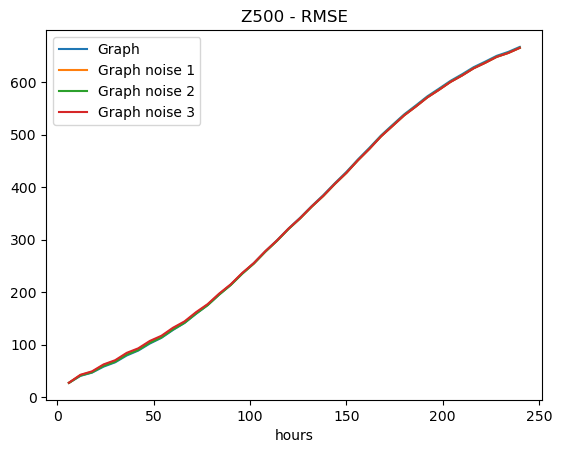

In [132]:
x = np.arange(1, len(ifs_2020.time) + 1) * 6 

# year_idx_tuple = None, 16
plt.plot(x, graph_2020[var_name].isel(days=slice(*year_idx_tuple)).mean(dim='days').values, label='Graph')
plt.plot(x, graph_1[var_name].isel(days=slice(*idx_tuple)).mean(dim='days').values, label='Graph noise 1')
plt.plot(x, graph_2[var_name].isel(days=slice(*idx_tuple)).mean(dim='days').values, label='Graph noise 2')
plt.plot(x, graph_3[var_name].isel(days=slice(*idx_tuple)).mean(dim='days').values, label='Graph noise 3')

plt.xlabel('hours')
plt.title(f'{var_name} - RMSE')
# plt.loglog()
plt.legend();

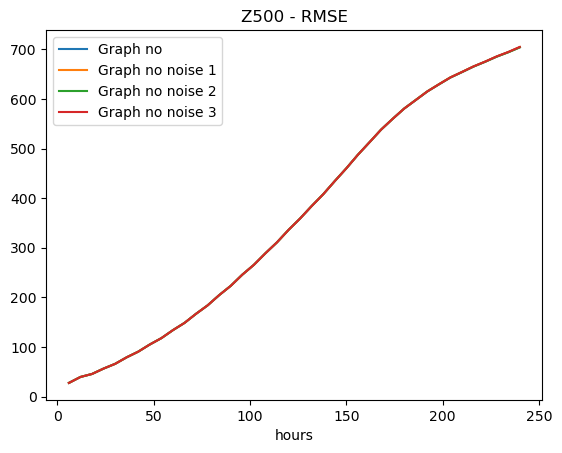

In [133]:
x = np.arange(1, len(ifs_2020.time) + 1) * 6 

# var_name = 'V500'
# idx_tuple = None, None 

plt.plot(x, graph_no_2020[var_name].isel(days=slice(*year_idx_tuple)).mean(dim='days').values, label='Graph no')
plt.plot(x, graph_no1[var_name].isel(days=slice(*idx_tuple)).mean(dim='days').values, label='Graph no noise 1')
plt.plot(x, graph_no2[var_name].isel(days=slice(*idx_tuple)).mean(dim='days').values, label='Graph no noise 2')
plt.plot(x, graph_no3[var_name].isel(days=slice(*idx_tuple)).mean(dim='days').values, label='Graph no noise 3')

plt.xlabel('hours')
plt.title(f'{var_name} - RMSE')
# plt.loglog()
plt.legend();

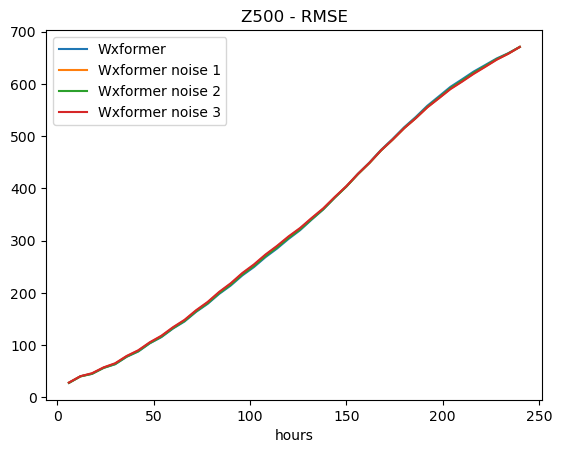

In [135]:
x = np.arange(1, len(ifs_2020.time) + 1) * 6 

# var_name = 'V500'
# idx_tuple = None, None 

plt.plot(x, wxformer_2020[var_name].isel(days=slice(*year_idx_tuple)).mean(dim='days').values, label='Wxformer')
plt.plot(x, wxformer_1[var_name].isel(days=slice(*idx_tuple)).mean(dim='days').values, label='Wxformer noise 1')
plt.plot(x, wxformer_2[var_name].isel(days=slice(*idx_tuple)).mean(dim='days').values, label='Wxformer noise 2')
plt.plot(x, wxformer_3[var_name].isel(days=slice(*idx_tuple)).mean(dim='days').values, label='Wxformer noise 3')

plt.xlabel('hours')
plt.title(f'{var_name} - RMSE')
# plt.loglog()
plt.legend();